# SFR & Kennicutt-Schmidt law

In [1]:
import os
import numpy as np
from IPython.display import Image
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


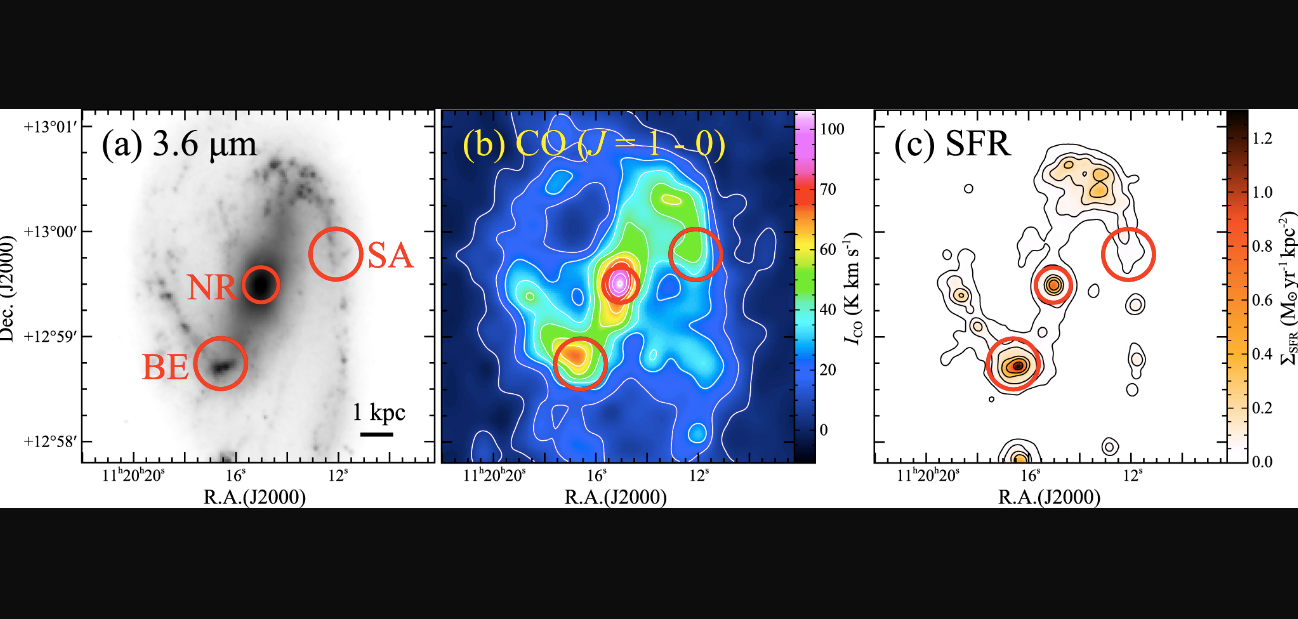

In [2]:
Image(filename='./images/CO_SFR.png')

### SFR

 $$\frac{SFR}{M_{\odot}yr^{-1}} = 5.37\times 10^{-42} \frac{L_{H\alpha}}{erg \times s^{-1}}$$

$$\Sigma_{SFR}[M_{\odot}yr^{-1}kpc^{-2}] $$

$$L(H_{\alpha}) = 4\pi (3.086\times 10^{24} d_L)^2 f(H_{\alpha})$$, where f(Hα) is the integrated flux in ergs s-1 cm-2 and dL is the luminosity distance in Mpc

In [3]:
Distance = 9.3
H_alpha = np.load('./data/H_alpha.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [4]:
scale = (Distance*1000*2*np.pi)/(360*60*60.) # kpc/acrsec
print(scale)

0.04508767234318684


In [5]:
SFR = np.zeros(dist_kpc.shape)
SFR = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 * H_alpha 

In [6]:
Sigma_SFR = np.zeros(dist_kpc.shape)
Sigma_SFR = SFR/(scale)**2

np.save('./data/Sigma_SFR.npy',Sigma_SFR)

/home/lera/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


Text(0.5, 1.0, '$\\Sigma_{SFR}$')

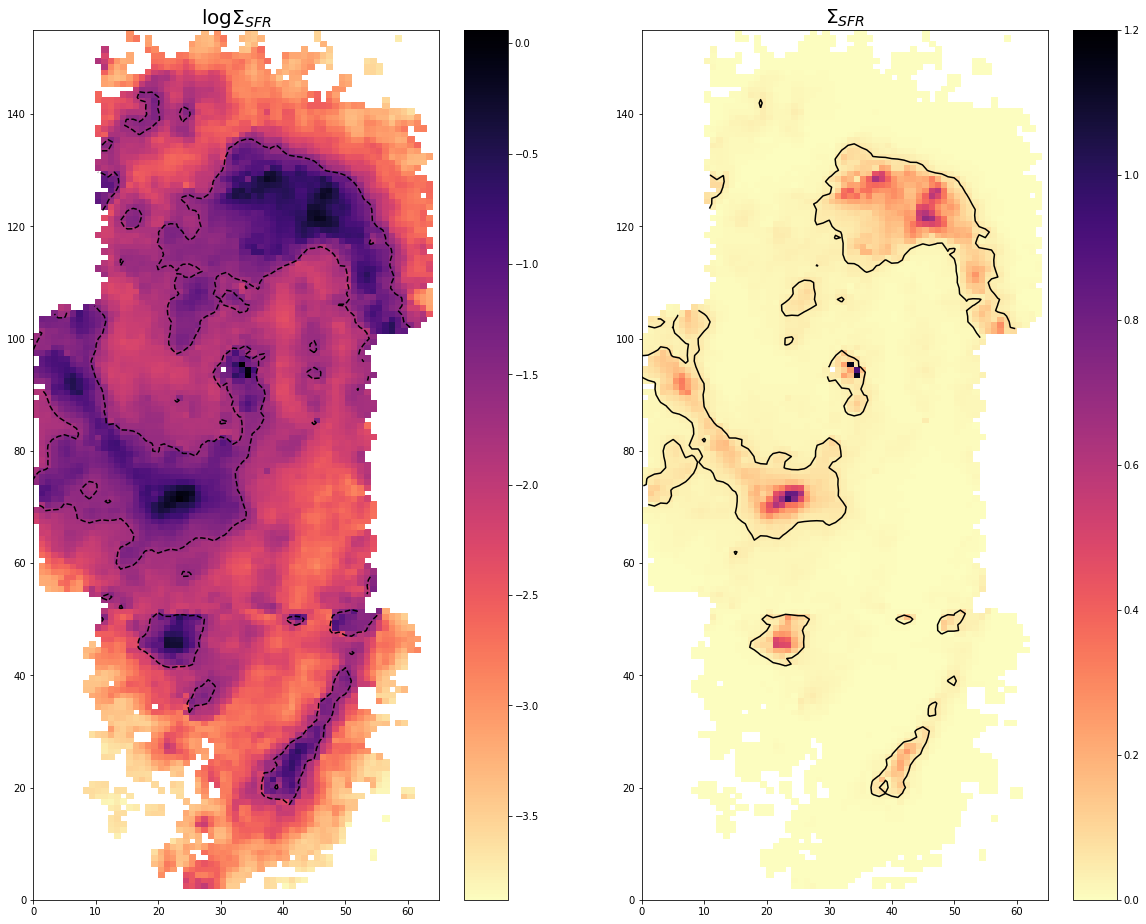

In [7]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[20, 16])
plt.subplot(1,2,1)

CS = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.6,],aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, np.log10(Sigma_SFR), cmap='magma_r')

quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$\log{\Sigma_{SFR}}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,],aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, Sigma_SFR, cmap='magma_r')
quadmesh.set_clim(vmin=0.,vmax = 1.2)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$\Sigma_{SFR}$', fontsize=20)

Правая картинка(без логарифма) похожа на ту, которую я представила вверху из [этой статьи](https://arxiv.org/pdf/1904.12430.pdf)

### Изобразим закон К-Ш для полной и обрезанной карты

$$\Sigma_{SFR}\propto {\Sigma_{gas}}^N$$, где $N=1.4,1.5$ 

Пусть $\Sigma_{SFR} = k\cdot {\Sigma_{gas}}^N$, тогда $\log{H_{\alpha}} = \log{k}+N\cdot log{\Sigma_{gas}}$

In [8]:
Sigma_H2 = np.load('./data/Sigma_H2.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
H_alpha = np.load('./data/H_alpha.npy')

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


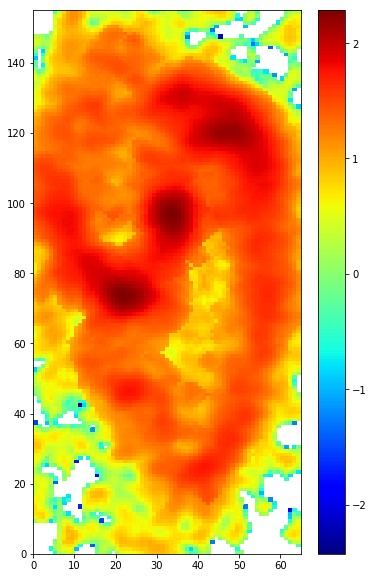

In [10]:
mask = (H_alpha != 0.)
Sigma_g = np.zeros(dist_kpc.shape)
Sigma_g = 1.36*(Sigma_HI + Sigma_H2)
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[6,10])
quadmesh = plt.pcolormesh(X, Y,np.log10(Sigma_g), cmap='jet')
plt.colorbar()

In [10]:
counts = np.zeros((50,30)) 
counts_cut = np.zeros((50,30))

for j, gas in enumerate(np.linspace(0.7, 2.2, 30)):
    for i, hlim in enumerate(np.linspace(-2.0, 0.5, 50)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts[i][j]+=1
                
                if (dist_kpc[k][l] <= 5) & (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts_cut[i][j]+=1    

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


Нарисуем закон К-Ш почти для полной и обрезанной карты

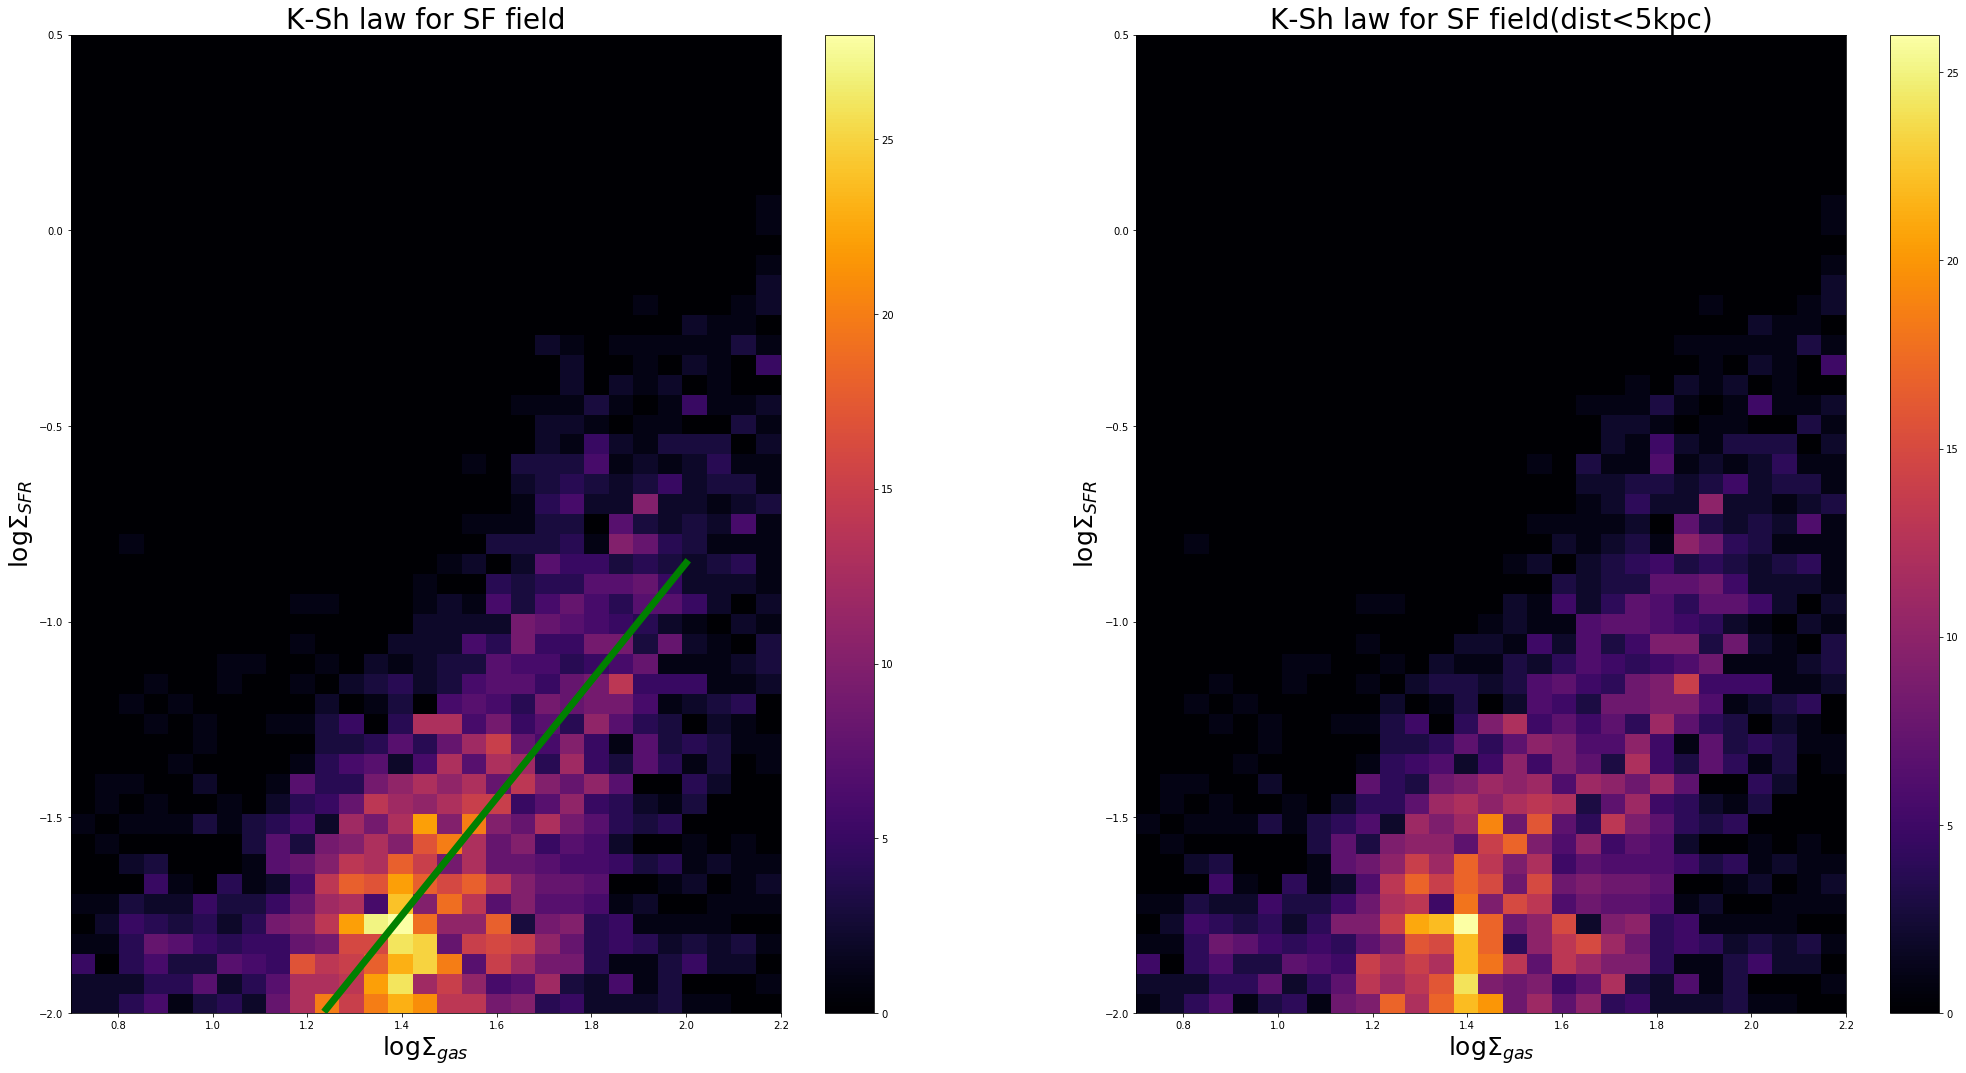

In [11]:
xx, yy = np.meshgrid(np.linspace(0.7, 2.2, 30),np.linspace(-2., 0.5, 50))
fig = plt.figure(figsize=[35, 18])

plt.subplot(1,2,1)

quadmesh = plt.pcolormesh(xx, yy, counts, cmap='inferno')
a = 1.5
b = -3.85
#В принципе похоже на закон К-Ш со степенью N=1.5,
plt.plot([1.24, 2.], [1.24*a+b, 2.*a+b], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()
          
plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(xx, yy, counts_cut, cmap='inferno')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field(dist<5kpc)', fontsize=28)
plt.colorbar()

In [11]:
counts = np.zeros((50,30)) 
x = []
y = []

for j, gas in enumerate(np.linspace(0.7, 2.2, 30)):
    for i, hlim in enumerate(np.linspace(-2.0, 0.5, 50)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts[i][j]+=1
                        x.append(np.log10(Sigma_g[k][l]))
                        y.append(np.log10(Sigma_SFR[k][l]))

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


In [14]:
from scipy.optimize import curve_fit
def func(x, beta,alpha):
    return alpha*x + beta

#guesses = [3.85, 1.5]
popt,pcov = curve_fit(func,y,x)#,p0=guesses)

print (popt,pcov)

[2.18160449 0.42488109] [[0.00025995 0.00016299]
 [0.00016299 0.00010953]]


$$log(\Sigma_{gas}) = \alpha \times log(\Sigma_{SFR}) + \beta$$
$$log(\Sigma_{SFR}) = \dfrac{1}{\alpha} \times log(\Sigma_{gas}) - \dfrac{\beta}{\alpha}$$

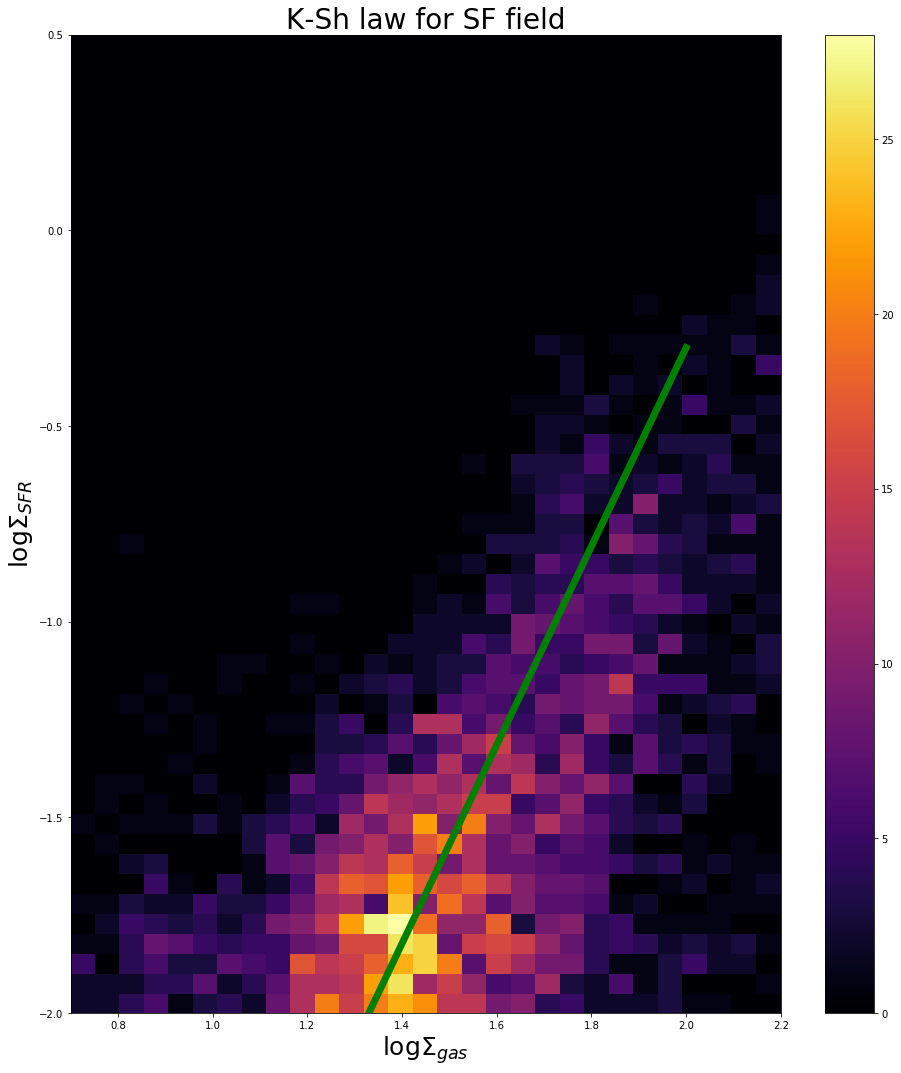

In [21]:
xx, yy = np.meshgrid(np.linspace(0.7, 2.2, 30),np.linspace(-2., 0.5, 50))
fig = plt.figure(figsize=[35, 18])

plt.subplot(1,2,1)

quadmesh = plt.pcolormesh(xx, yy, counts, cmap='inferno')
a = 1./0.425
b = -2.18/0.425
#В принципе похоже на закон К-Ш со степенью N=1.5,
plt.plot([-2.*0.425+2.18,2.], [-2., a*2.+b], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()

In [22]:
def func(x, beta,alpha):
    return alpha*x + beta

Найдём зависимость угла наклона от порогового значения $\Sigma_{SFR}$

In [40]:
from scipy.optimize import curve_fit
inclin = []


SFR_lim = np.array(np.linspace(0.01,0.06,100))

for lim in SFR_lim:
    x = []
    y = []
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (H_alpha[k][l] != 0.):
                        
                if (0.7 <= np.log10(Sigma_g[k][l])) & (lim <= Sigma_SFR[k][l]):
                    
                    x.append(np.log10(Sigma_g[k][l]))
                    y.append(np.log10(Sigma_SFR[k][l]))
                            
    popt,pcov = curve_fit(func,y,x)
    inclin.append(1./popt[1])

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


Text(0.5, 0, '$\\Sigma_{SRF}^{lim}$')

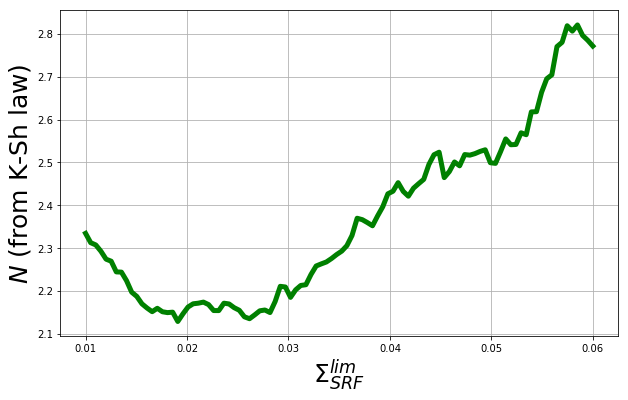

In [44]:
fig = plt.figure(figsize=[10, 6])
plt.plot(SFR_lim, inclin, '-', lw=5, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)


#### Статистическими методами был подобран пороги для звёздообразования $\log{H_{alpha}}$, надём эквивалентное им значения $\Sigma_{SFR}$

In [7]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -14.3,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.032083769677450996


In [8]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -14.18,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.0422946455755916


In [5]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -14.15,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.04531952924242865


In [5]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -14.47,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.02169129046532212


In [5]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -15.05,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.005705390701384224


#### Нарисуем параметры гравитационной неустойчивости: параметр Тумре $Q_{eff} (Q_{lim} = 3)$ и galaxy shear $(\alpha_A = 3.3)$ со статистически посчитанными для них $\Sigma_{SFR}^{lim}$ равными  0.045 и 0.032 соответственно

In [2]:
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
shear_method = np.load('./data/shear_method.npy')
Qeff_min = np.load('./data/Qeff_min.npy')
Qeff_max = np.load('./data/Qeff_max.npy')
dist_kpc = np.load('./data/dist_kpc.npy')


Text(0.5, 1.0, 'galaxy shear')

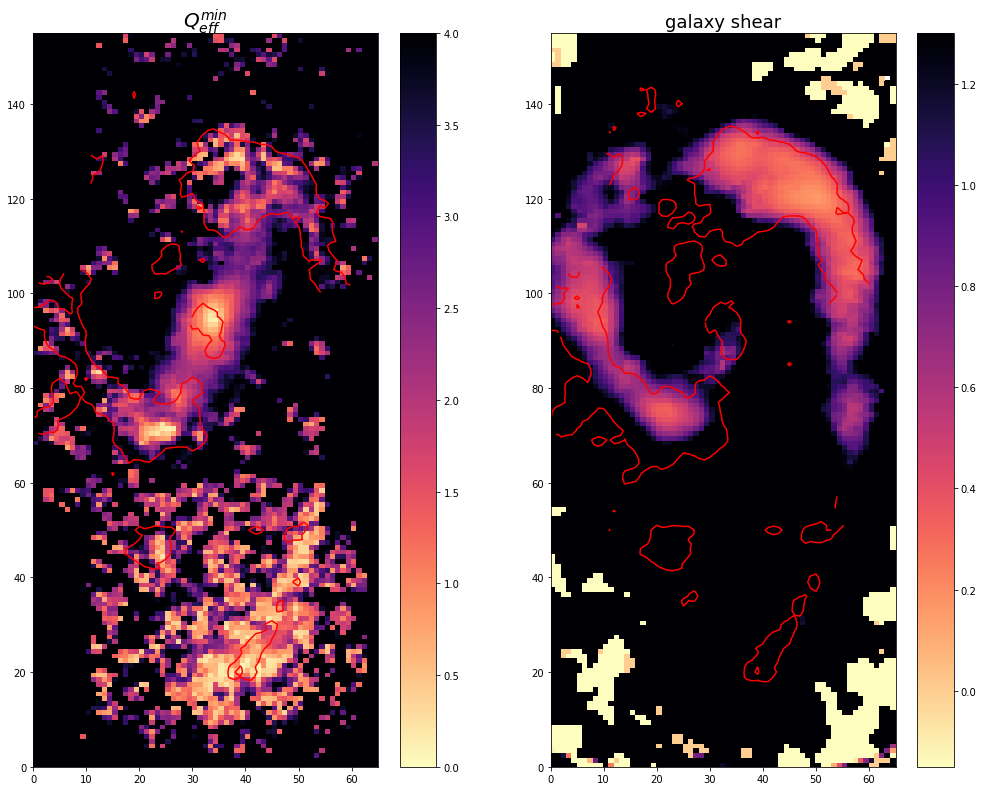

In [5]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='magma_r')
quadmesh.set_clim(vmin=0., vmax=4)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, shear_method, cmap='magma_r')
quadmesh.set_clim(vmin=-0.15, vmax = 1.3)
plt.colorbar()
plt.title('galaxy shear', fontsize=18)

In [15]:
Inst_field1 = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(Qeff_min[i][j] <= 3.):
            Inst_field1[i][j] = 1
        else: 
            Inst_field1[i][j] = 0
            
Inst_field3 = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(Qeff_max[i][j] <= 3.):
            Inst_field3[i][j] = 1
        else: 
            Inst_field3[i][j] = 0            
            
Inst_field2 = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(0. < shear_method[i][j] <= 1.):
            Inst_field2[i][j] = 1
        else: 
            Inst_field2[i][j] = 0            

Text(0.5, 1.0, 'galaxy shear')

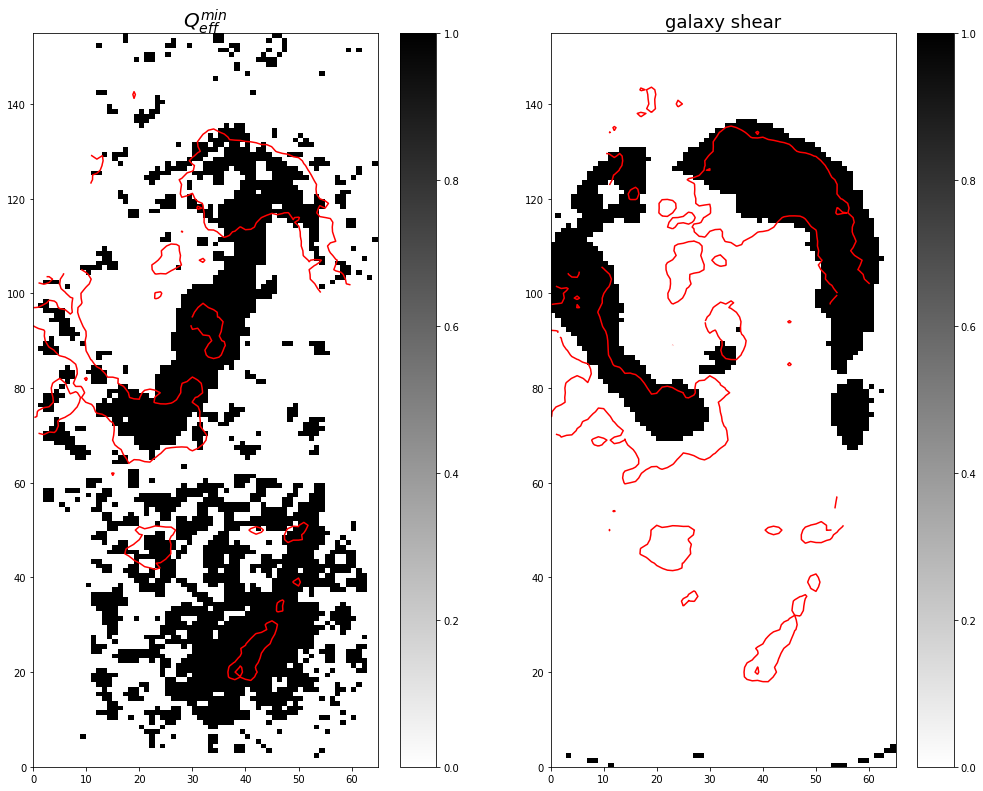

In [16]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field1, cmap='gist_yarg')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field2, cmap='gist_yarg')
plt.colorbar()
plt.title('galaxy shear', fontsize=18)

Text(0.5, 1.0, '$Q_{eff}^{max}$')

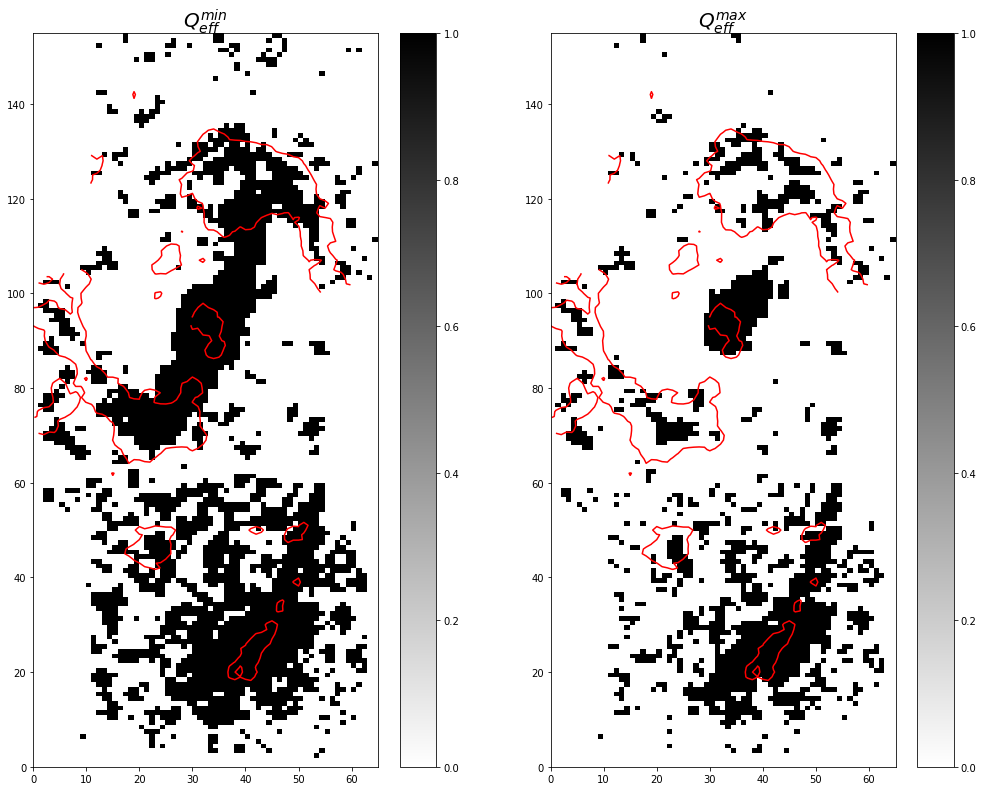

In [17]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field1, cmap='gist_yarg')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field3, cmap='gist_yarg')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)
